In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()


1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df2.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df_dummy= pd.get_dummies(df2,columns=['sex','smoker','region'],drop_first=True)
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
df3=df_dummy.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   uint8  
 5   smoker_yes        1337 non-null   uint8  
 6   region_northwest  1337 non-null   uint8  
 7   region_southeast  1337 non-null   uint8  
 8   region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 58.8 KB


In [ ]:
df3.isnull().sum()

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [ ]:
df3.bmi=df3['bmi'].astype(int)

In [ ]:
df3.charges=df3.charges.astype(int)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1337 non-null   int64
 1   bmi               1337 non-null   int64
 2   children          1337 non-null   int64
 3   charges           1337 non-null   int64
 4   sex_male          1337 non-null   uint8
 5   smoker_yes        1337 non-null   uint8
 6   region_northwest  1337 non-null   uint8
 7   region_southeast  1337 non-null   uint8
 8   region_southwest  1337 non-null   uint8
dtypes: int64(4), uint8(5)
memory usage: 58.8 KB


In [ ]:
X=df3.drop('charges',axis=1)

In [ ]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


In [ ]:
Y=df3.charges

In [ ]:
Y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

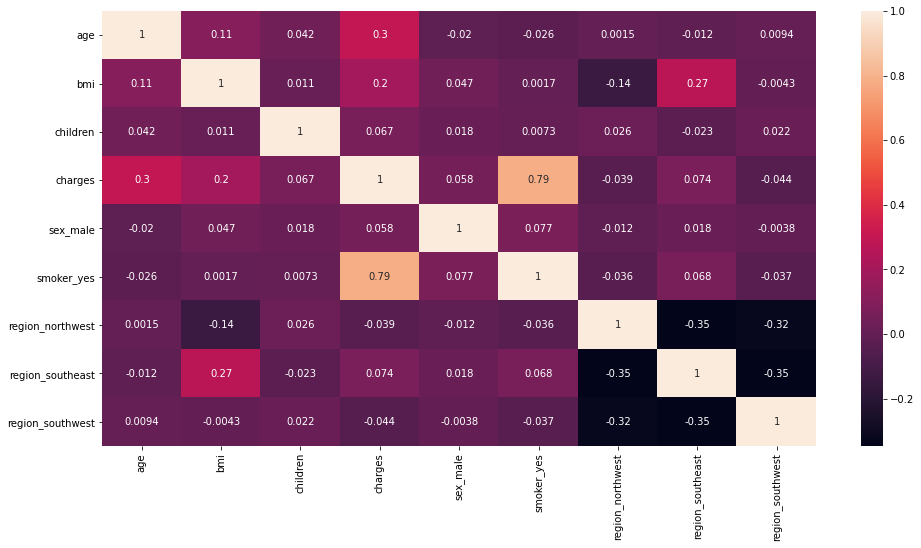

In [ ]:
fig = plt.figure(figsize = (16,8))
sns.heatmap(df3.corr(), annot = True)

In [ ]:
df3.corr()['charges']

age                 0.298309
bmi                 0.196236
children            0.067390
charges             1.000000
sex_male            0.058046
smoker_yes          0.787234
region_northwest   -0.038695
region_southeast    0.073577
region_southwest   -0.043637
Name: charges, dtype: float64

age


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


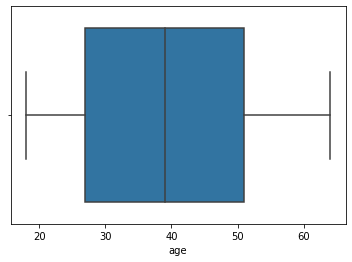

bmi


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


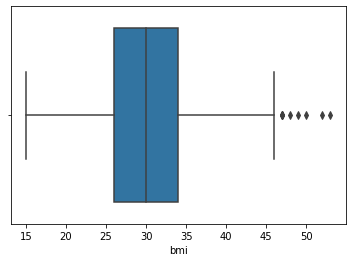

children


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


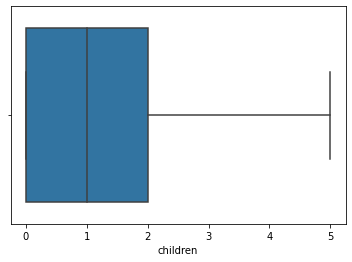

charges


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


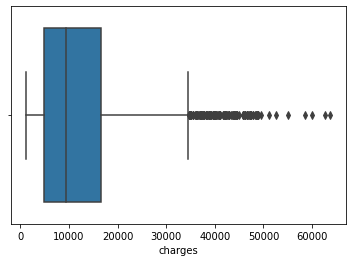

sex_male


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


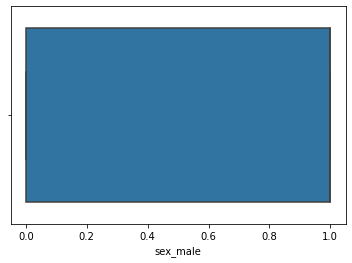

smoker_yes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


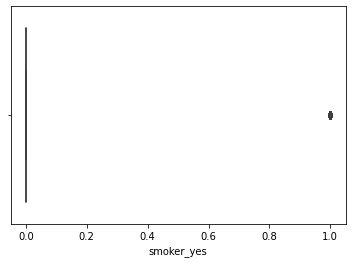

region_northwest


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


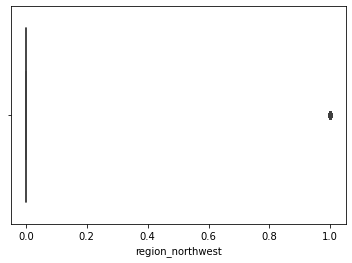

region_southeast


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


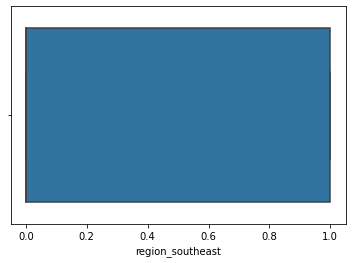

region_southwest


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


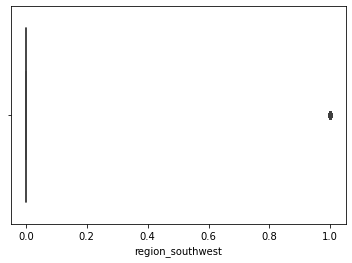

In [ ]:
for i in df3.columns:
    print(i)
    sns.boxplot(df3[i],data = df3)
    plt.show()

In [ ]:
df3.bmi.value_counts()

28    92
30    90
33    82
27    82
32    78
31    76
29    73
25    72
26    67
34    64
35    57
24    57
36    55
23    52
37    42
22    40
38    36
39    35
21    32
40    23
20    23
41    19
19    17
42    15
17    12
18     9
43     7
46     7
44     7
45     4
47     4
16     2
53     1
52     1
48     1
49     1
50     1
15     1
Name: bmi, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


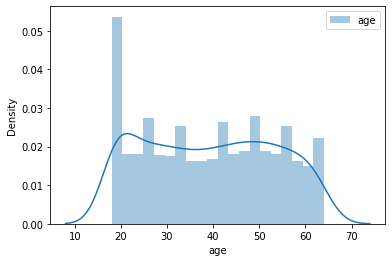

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


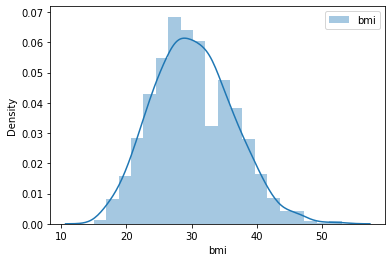

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


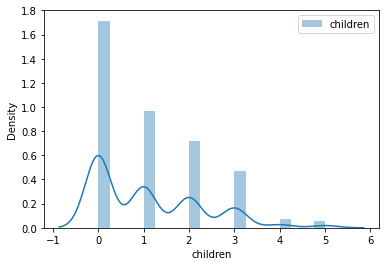

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


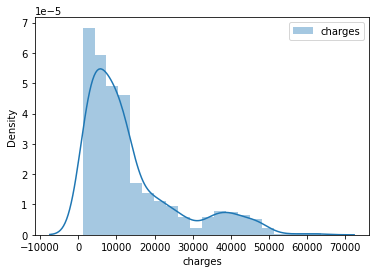

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


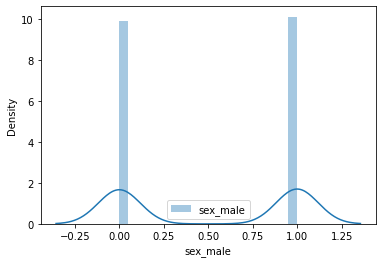

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


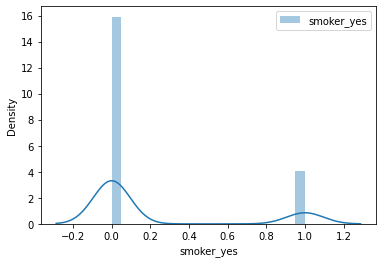

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


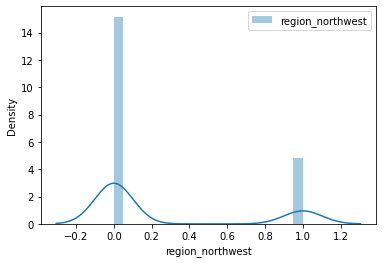

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


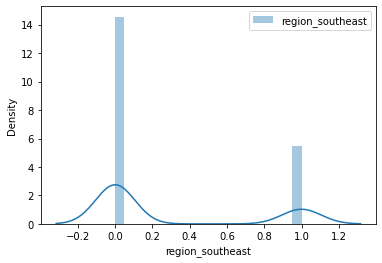

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


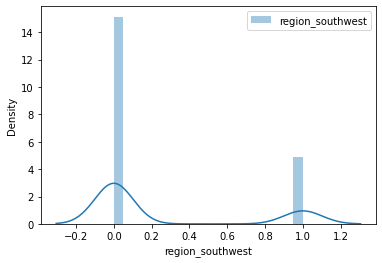

In [ ]:
for val in df3.columns:
    sns.distplot(df3[val], kde = True,bins=20,label=val)
    plt.legend()
    plt.show()

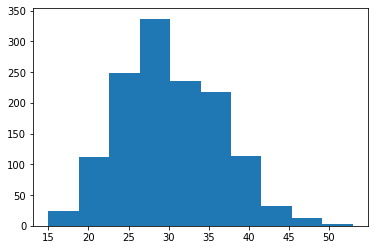

In [ ]:
plt.hist(df3.bmi)
plt.show()

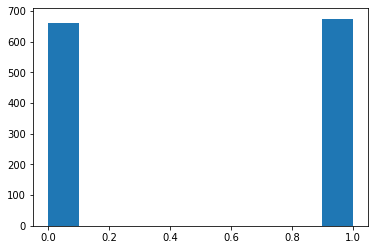

In [ ]:
plt.hist(df3.sex_male)
plt.show()

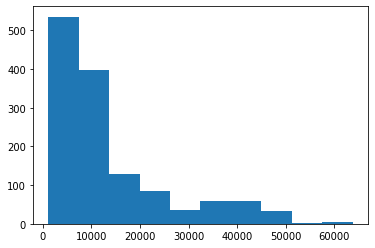

In [ ]:
plt.hist(df3.charges)
plt.show()

In [ ]:
df3.charges.value_counts()

8334     2
2457     2
1242     2
14001    2
13224    2
        ..
8891     1
37607    1
9549     1
39871    1
13831    1
Name: charges, Length: 1284, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 4)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lm.predict(X_test) 

In [ ]:
y_pred[1]

10967.133941173694

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7228334709815893
Adjusted R^2: 0.7142723426721403
MAE: 4133.520947918729
MSE: 34806969.84105073
RMSE: 5899.743201280097


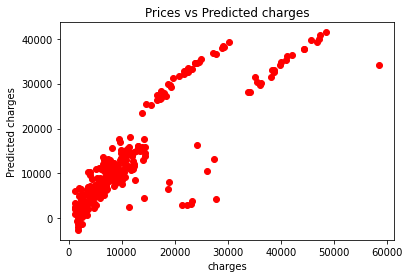

In [ ]:
plt.scatter(y_test,
            y_pred , 
            color = 'red')


plt.xlabel("charges")
plt.ylabel("Predicted charges")
plt.title("Prices vs Predicted charges")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


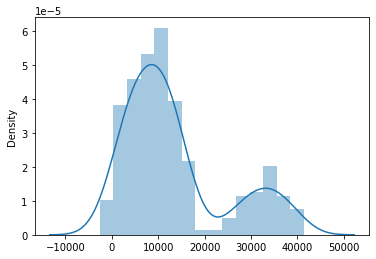

In [ ]:
sns.distplot(y_pred)

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(y_test-y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.9076603744583065

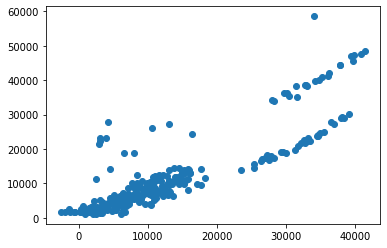

In [ ]:
plt.scatter(y_pred,y_test)


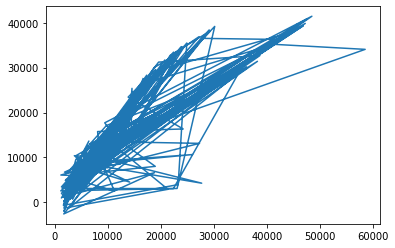

In [ ]:
plt.plot(y_test,y_pred)
plt.show()

In [ ]:
df3.charges.mean()

13278.62827225131

In [ ]:
df3.charges.median()

9386.0

In [ ]:
df3.charges.mode()[0]

1137

## after outlier treatment of target(charges) data. bold text

In [ ]:

X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


In [ ]:
Y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [ ]:
a=df3.charges.quantile(0.75)
b=df3.charges.quantile(0.25)
iqr=a-b
mx=a+iqr*1.5
mi=b-iqr*1.5
print(iqr,mx,mi)

11911.0 34523.5 -13120.5


In [ ]:
df3.charges[df3.charges>mx]=mx

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.charges[df3.charges<mi]=mi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


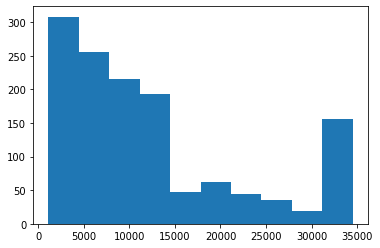

In [ ]:
plt.hist(df3.charges)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


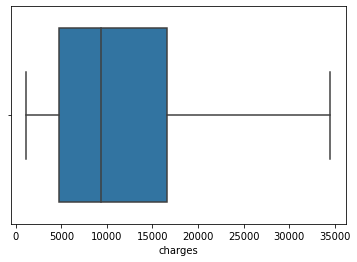

In [ ]:
sns.boxplot(df3['charges'],data = df3)
plt.show()

In [ ]:
Y=df3.charges

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 4)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lm.predict(X_test) 

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#before outlier treatment
# R^2: 0.7228334709815893
# Adjusted R^2: 0.7142723426721403
# MAE: 4133.520947918729
# MSE: 34806969.84105073
# RMSE: 5899.743201280097

R^2: 0.7546051547959907
Adjusted R^2: 0.7470253912375657
MAE: 3202.2428076907813
MSE: 22528184.26145165
RMSE: 4746.386442489871


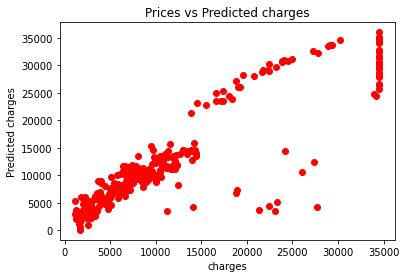

In [ ]:
plt.scatter(y_test,
            y_pred , 
            color = 'red')


plt.xlabel("charges")
plt.ylabel("Predicted charges")
plt.title("Prices vs Predicted charges")
plt.show()

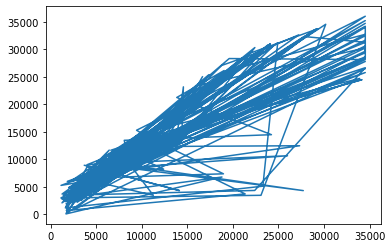

In [ ]:
plt.plot(y_test,y_pred)
plt.show()

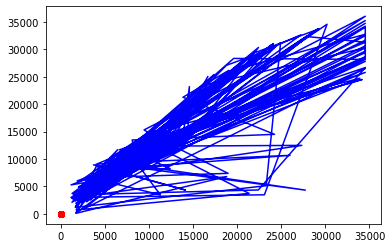

In [ ]:
# visualizing the results
# #plot for the TRAIN
  
# plt.scatter(X_train, y_train, color='red') # plotting the observation line
# plt.plot(X_train, regressor.predict(X_test), color='blue') # plotting the regression line
# plt.title("Salary vs Experience (Training set)") # stating the title of the graph
  
# plt.xlabel("Years of experience") # adding the name of x-axis
# plt.ylabel("Salaries") # adding the name of y-axis
# plt.show() # specifies end of graph

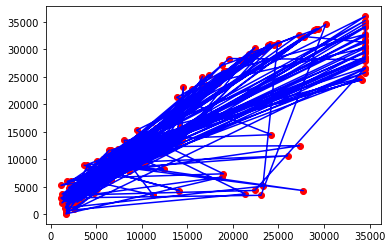

In [ ]:
#plot for the TEST
 
# plt.scatter(y_test,y_pred, color='red') 
# plt.plot(y_test,y_pred, color='blue') # plotting the regression line
 
# plt.title("Salary vs Experience (Testing set)")
 
# plt.xlabel("Years of experience") 
# plt.ylabel("Salaries") 
# plt.show() 